<h1> Classification [Logistic Regression]</h1>

In Logistic Regression, we look at the data graphically and draw a line to separate the data. 
The model is defined by the coefficients that define the line. These coefficients are called parameters.
Since the model is defined by these parameters, 
Logistic Regression is a parametric machine learning algorithm.

<h2> I- Logistic_Regression Breast_cancer </h2>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression

In [38]:
cancer_data = load_breast_cancer()
print(cancer_data.keys())
#print(cancer_data['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [39]:
cancer_data['data'].shape

(569, 30)

In [40]:
#cancer_data['feature_names']

In [41]:
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']
#print(df.head())

In [42]:
cancer_data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [43]:
X = df[cancer_data.feature_names].values
y = df['target'].values

In [44]:
model = LogisticRegression()
model.fit(X, y)

c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [45]:
print("prediction for datapoint 0:", model.predict([X[0]]))
print(model.score(X, y))

prediction for datapoint 0: [0]
0.945518453427065


In [46]:
theta_0 = model.intercept_[0]
theta_1 = model.coef_[0, 0]
theta_2 = model.coef_[0, 1]

Ntfekrou la formule dial logistic regression 

$$p(y=1|x; \theta) = \frac{1}{1 + e^{\theta_0 + \theta_1 x_1 + \theta_2 x_2}}$$

N9elbou ha bash nel9aou 

$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = log(\frac{p}{1-p})$$

lmou3adala dial mousta9im hiya 
$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$$ 

That is, 

$$x_2 = \frac{1}{\theta_2} (\theta_0 + \theta_1 x_1)$$ 

In [47]:
def decision_boundary(theta_0, theta_1, theta_2, l_x):
    return (1 / theta_2) * (-theta_0 -theta_1 * l_x)

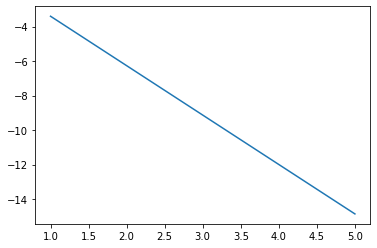

In [48]:
# nzidou decision boundary 
l_x = np.linspace(1, 5)
l_y = decision_boundary(theta_0, theta_1, theta_2, l_x)
plt.plot(l_x, l_y, label='decision boundary')

<h2> II- Logistic_Regression Titanic data  </h2>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score,confusion_matrix
from sklearn.metrics import recall_score, precision_recall_fscore_support

In [50]:
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv') #Uploiding data
df['male'] = df['Sex'] == 'male' #add column male (boolean) is male or not
data= df[['Age','Fare','Survived']] # Features
data=data.sample(frac=1,random_state=42)
data_train,data_test=train_test_split(data,test_size=0.2)

In [51]:
target_0= data[data['Survived']==0]
target_1= data[data['Survived']==1]

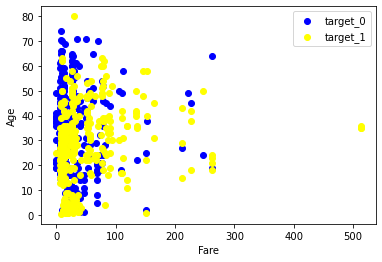

In [52]:
plt.scatter(target_0['Fare'],target_0['Age'],color='blue',label='target_0')
plt.scatter(target_1['Fare'],target_1['Age'],color='yellow',label='target_1')
plt.legend()
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()        

In [53]:
x_train=data_train[['Fare','Age']]
y_train=data_train['Survived']
x_test=data_test[['Fare','Age']]
y_test=data_test['Survived']

model = LogisticRegression() #model
model.fit(x_train, y_train) #training

sensitivity_score = recall_score

def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0]

In [54]:
y_pred = model.predict(x_test) #Predection 
print(model.predict_proba(x_test))
#y_pred = model.predict_proba(X_test)[:, 1] > 0.75

[[6.57368416e-01 3.42631584e-01]
 [2.57934777e-01 7.42065223e-01]
 [6.46661472e-01 3.53338528e-01]
 [6.66217919e-01 3.33782081e-01]
 [5.56988644e-01 4.43011356e-01]
 [7.84218956e-01 2.15781044e-01]
 [7.00265268e-01 2.99734732e-01]
 [4.38589526e-01 5.61410474e-01]
 [6.80997284e-01 3.19002716e-01]
 [7.94010276e-01 2.05989724e-01]
 [7.00373820e-01 2.99626180e-01]
 [6.64484789e-01 3.35515211e-01]
 [6.78610343e-01 3.21389657e-01]
 [5.77911784e-01 4.22088216e-01]
 [6.66271750e-01 3.33728250e-01]
 [6.74324014e-01 3.25675986e-01]
 [7.24873864e-01 2.75126136e-01]
 [4.84889662e-01 5.15110338e-01]
 [6.39719465e-01 3.60280535e-01]
 [6.50111009e-01 3.49888991e-01]
 [6.43053015e-01 3.56946985e-01]
 [6.67182862e-01 3.32817138e-01]
 [6.62518476e-01 3.37481524e-01]
 [6.81055003e-01 3.18944997e-01]
 [6.80046192e-01 3.19953808e-01]
 [6.74995992e-01 3.25004008e-01]
 [6.63908176e-01 3.36091824e-01]
 [6.60547315e-01 3.39452685e-01]
 [5.80069654e-01 4.19930346e-01]
 [6.25485994e-01 3.74514006e-01]
 [7.533778

In [55]:
#precision_score= TP/(TP+FP) 
#recall_score=TP/(TP+FN)
#f1_score= 2*( precision * recall ) /(precision +recall)
#accuracy = If you have 100 datapoints and predict 70 of them correctly and 30 incorrectly, the accuracy is 70%.

In [56]:
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))
print(f'confusion matrix :{confusion_matrix(y_test,y_pred)}')
print("sensitivity:", sensitivity_score(y_test, y_pred))
print("specificity:", specificity_score(y_test, y_pred))

accuracy: 0.6629213483146067
precision: 0.7368421052631579
recall: 0.2028985507246377
f1 score: 0.3181818181818182
confusion matrix :[[104   5]
 [ 55  14]]
sensitivity: 0.2028985507246377
specificity: 0.9541284403669725


In [57]:
theta_0 = model.intercept_[0]
theta_1 = model.coef_[0, 0]
theta_2 = model.coef_[0, 1]

def decision_boundary(theta_0, theta_1, theta_2, l_x):
    return (1 / theta_2) * (-theta_0 -theta_1 * l_x)


In [58]:
# nzidou decision boundary 
l_x = np.linspace(1, 100)
l_y = decision_boundary(theta_0, theta_1, theta_2, l_x)

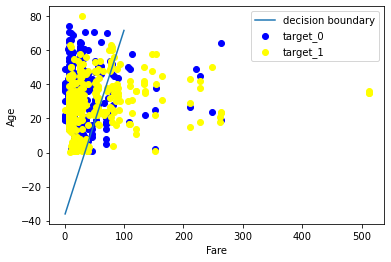

In [59]:
plt.scatter(target_0['Fare'],target_0['Age'],color='blue',label='target_0')
plt.scatter(target_1['Fare'],target_1['Age'],color='yellow',label='target_1')
plt.plot(l_x, l_y, label='decision boundary')
plt.legend()
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

<h3>K-Fold selection</h3>

In [60]:
from sklearn.model_selection import KFold

In [65]:
X = data[['Fare', 'Age']].values
y = data['Survived'].values

kf = KFold(n_splits=3, shuffle=True) # (k,mixer)
splits = list(kf.split(X))                #We used the KFold class and split method to get the indices that are in each 
print(splits)                             #of the splits. 
                                     
for train, test in kf.split(X):
    print(train, test)                        
print(splits[0])

[(array([  0,   1,   2,   5,   7,   9,  12,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  35,  36,  37,
        38,  39,  40,  42,  43,  45,  46,  47,  48,  50,  51,  52,  54,
        55,  56,  57,  58,  60,  62,  63,  64,  65,  66,  67,  71,  74,
        75,  76,  77,  79,  80,  81,  82,  83,  85,  86,  89,  93,  95,
        97,  99, 100, 101, 104, 105, 106, 107, 108, 109, 110, 111, 115,
       118, 119, 120, 123, 124, 126, 127, 129, 130, 131, 132, 134, 135,
       137, 139, 144, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156,
       157, 158, 159, 160, 163, 165, 166, 169, 172, 173, 174, 177, 178,
       179, 180, 181, 183, 184, 187, 188, 189, 191, 192, 193, 195, 196,
       197, 198, 200, 202, 203, 204, 206, 207, 208, 212, 213, 214, 215,
       216, 218, 219, 223, 230, 233, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 247, 248, 250, 251, 253, 255, 257, 258, 259,
       260, 262, 263, 264, 266, 267, 268, 269, 271, 273, 274, 

In [66]:
first_split = splits[0]
train_indices, test_indices = first_split

print("training set indices:", train_indices)
print("test set indices:", test_indices)

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]
print("X_train")
print(X_train)
print("y_train", y_train)
print("X_test")
print(X_test)
print("y_test", y_test)

training set indices: [  0   1   2   5   7   9  12  14  15  16  17  18  19  20  21  22  23  24
  25  26  27  28  29  35  36  37  38  39  40  42  43  45  46  47  48  50
  51  52  54  55  56  57  58  60  62  63  64  65  66  67  71  74  75  76
  77  79  80  81  82  83  85  86  89  93  95  97  99 100 101 104 105 106
 107 108 109 110 111 115 118 119 120 123 124 126 127 129 130 131 132 134
 135 137 139 144 146 147 148 149 150 151 153 154 155 156 157 158 159 160
 163 165 166 169 172 173 174 177 178 179 180 181 183 184 187 188 189 191
 192 193 195 196 197 198 200 202 203 204 206 207 208 212 213 214 215 216
 218 219 223 230 233 236 237 238 239 240 241 242 243 244 245 246 247 248
 250 251 253 255 257 258 259 260 262 263 264 266 267 268 269 271 273 274
 276 277 279 281 283 287 290 292 294 295 296 297 298 299 300 303 304 305
 307 308 309 310 312 314 316 317 318 319 322 324 325 327 329 331 333 334
 335 336 338 339 340 342 343 344 345 347 348 349 351 352 353 355 356 357
 359 360 361 363 365 366 368 

In [69]:
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)
print(np.mean(scores))

[0.6554054054054054, 0.6621621621621622, 0.6644067796610169]
0.6606581157428615


Now that we’ve calculated the accuracy, we no longer need the 5 different models that we’ve built. For future use, we just want a single model. To get the single best possible model, we build a model on the whole dataset. If we’re asked the accuracy of this model, we use the accuracy calculated by cross validation even though we haven’t actually tested this particular model with a test set.